In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
all_features = pd.read_csv('osmia_dataset.csv')
all_features

,system:index,NDBI,NDVI,NDWI,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,precipitation,.geo
0,00000000000000000f7a,0.012074,-0.402634,0.097655,7620.035192,9006.176595,8271.327044,7226.766872,38944.016819,0.075424,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
1,00000000000000000faf,-0.020069,-0.023069,-0.048423,7940.566603,10233.029397,10201.181330,11638.328457,33687.287542,0.012371,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
2,00000000000000001166,-0.020069,-0.023069,-0.048423,7940.566603,10233.029397,10201.181330,11638.328457,33687.287542,0.012371,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
3,000000000000000017e1,0.011313,-0.474968,0.106230,8227.765812,9235.920783,8328.348527,7295.119497,41027.020705,0.159736,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
4,00000000000000001868,-0.066763,-0.018702,-0.002228,7977.566532,9715.077733,9744.065649,11149.962829,33537.655289,0.112416,"{""type"":""Point"",""coordinates"":[3.4000021258377..."
...,...,...,...,...,...,...,...,...,...,...,...
661,00000000000000003650,-0.051887,0.463708,-0.192836,9049.686955,9969.402253,10172.383456,16393.160588,43977.888193,0.104395,"{""type"":""Point"",""coordinates"":[9.4658599800738..."
662,0000000000000000215e,-0.045980,0.275001,-0.052705,9486.733338,10255.843256,10070.946895,12595.461079,42375.714804,0.192657,"{""type"":""Point"",""coordinates"":[16.368887302488..."
663,000000000000000018f2,0.006674,0.281105,-0.156313,9774.839369,10411.438044,10584.894665,14140.690978,43952.442004,0.110542,"{""type"":""Point"",""coordinates"":[3.1131526141706..."
664,0000000000000000362d,-0.117991,0.272154,0.106793,35015.733356,33508.116712,33619.420177,34266.615761,36336.764810,0.061237,"{""type"":""Point"",""coordinates"":[10.400385001551..."


In [6]:


all_features = all_features[['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI', 'precipitation', '.geo']]
all_features['geometry'] = all_features['.geo'].apply(lambda x: Point(json.loads(x)['coordinates']))
all_features = all_features.drop(columns='.geo')
gdf = gpd.GeoDataFrame(all_features, geometry='geometry')
gdf = gdf.dropna()
gdf

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,precipitation,geometry
0,7620.035192,9006.176595,8271.327044,7226.766872,38944.016819,0.012074,-0.402634,0.097655,0.075424,POINT (3.40000 51.50000)
1,7940.566603,10233.029397,10201.181330,11638.328457,33687.287542,-0.020069,-0.023069,-0.048423,0.012371,POINT (3.40000 51.50000)
2,7940.566603,10233.029397,10201.181330,11638.328457,33687.287542,-0.020069,-0.023069,-0.048423,0.012371,POINT (3.40000 51.50000)
3,8227.765812,9235.920783,8328.348527,7295.119497,41027.020705,0.011313,-0.474968,0.106230,0.159736,POINT (3.40000 51.50000)
4,7977.566532,9715.077733,9744.065649,11149.962829,33537.655289,-0.066763,-0.018702,-0.002228,0.112416,POINT (3.40000 51.50000)
...,...,...,...,...,...,...,...,...,...,...
661,9049.686955,9969.402253,10172.383456,16393.160588,43977.888193,-0.051887,0.463708,-0.192836,0.104395,POINT (9.46586 48.94191)
662,9486.733338,10255.843256,10070.946895,12595.461079,42375.714804,-0.045980,0.275001,-0.052705,0.192657,POINT (16.36889 48.22055)
663,9774.839369,10411.438044,10584.894665,14140.690978,43952.442004,0.006674,0.281105,-0.156313,0.110542,POINT (3.11315 50.63284)
664,35015.733356,33508.116712,33619.420177,34266.615761,36336.764810,-0.117991,0.272154,0.106793,0.061237,POINT (10.40039 53.25396)


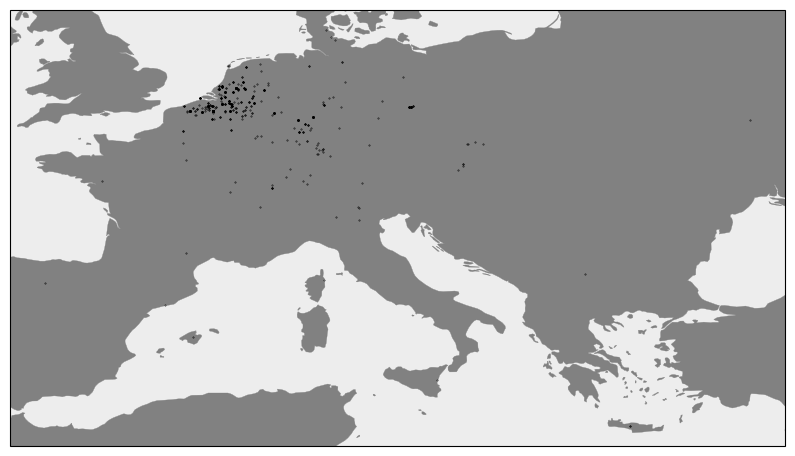

In [7]:

import cartopy.feature as cfeature
import cartopy.crs as ccrs

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

gdf.plot(ax=ax, markersize=.11, c='k') 

plt.show()

In [8]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# feature_matrix = gdf[['x', 'y', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI']].copy()
feature_matrix = gdf[['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'ST_B10', 'NDBI', 'NDVI', 'NDWI', 'precipitation']].copy() # without lat/lon
# feature_matrix = gdf[['ST_B10', 'NDBI', 'NDVI', 'NDWI']].copy() # metrics only

# log scale?
feature_matrix['SR_B2'] = np.log(gdf['SR_B2'] + 1)
feature_matrix['SR_B3'] = np.log(gdf['SR_B3'] + 1)
feature_matrix['SR_B4'] = np.log(gdf['SR_B4'] + 1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_matrix_scaled = scaler.fit_transform(feature_matrix)
feature_matrix_scaled

array([[-0.94660675, -0.92736202, -1.05516206, ..., -3.02114195,
         0.96451977, -0.69650404],
       [-0.87472197, -0.67302056, -0.64631712, ..., -1.39463805,
        -0.00710433, -2.1998397 ],
       [-0.87472197, -0.67302056, -0.64631712, ..., -1.39463805,
        -0.00710433, -2.1998397 ],
       ...,
       [-0.51213699, -0.63859759, -0.57432885, ..., -0.09120204,
        -0.7247267 ,  0.14082115],
       [ 1.71413325,  1.68940648,  1.6788806 , ..., -0.12955779,
         1.02530186, -1.03474663],
       [-0.74467243, -0.64591381, -0.67695882, ..., -0.12955779,
        -0.70911216, -1.43530578]])

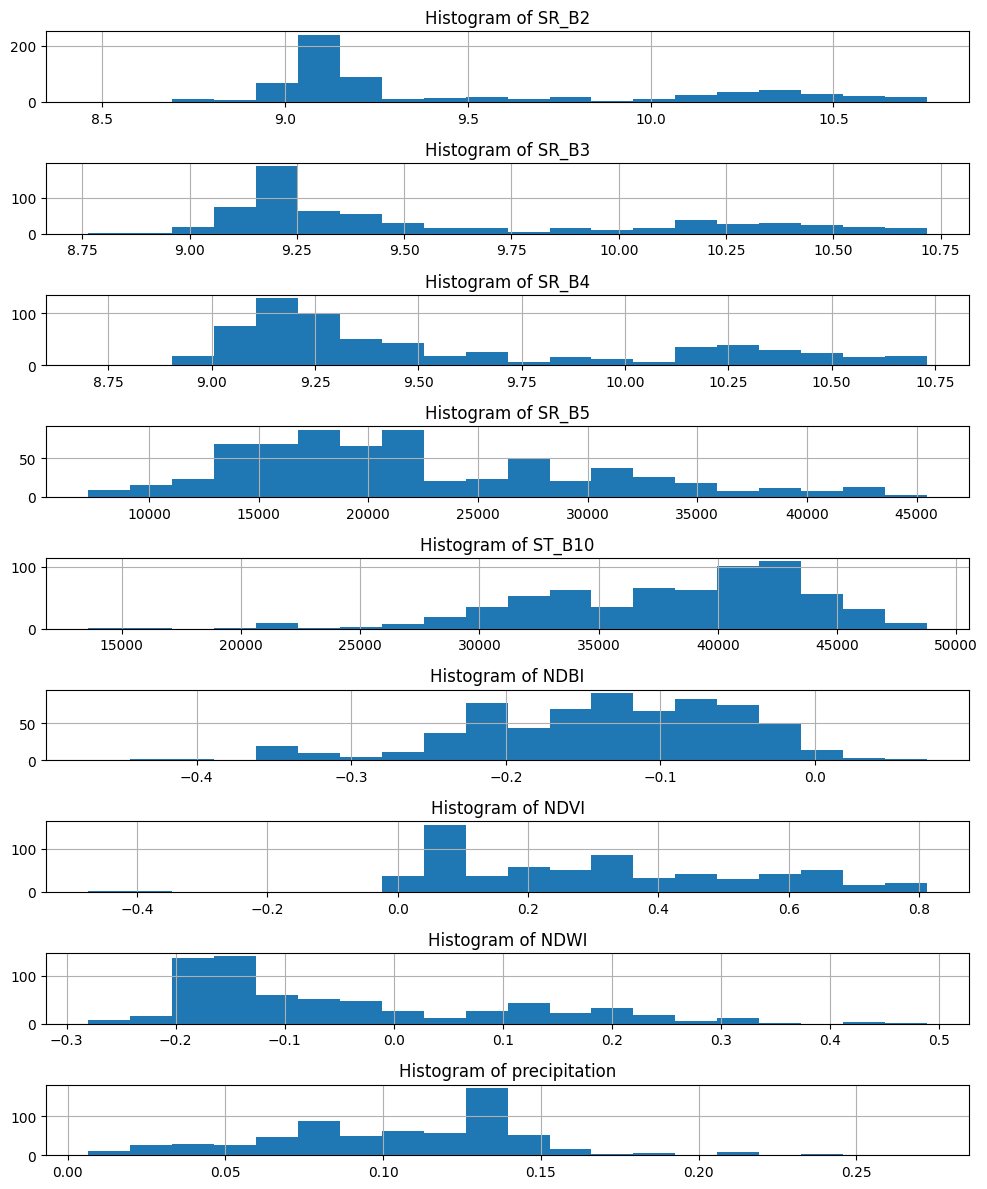

In [10]:
plt.figure(figsize=(10, 1 * len(gdf.columns)))

# Iterate over the columns
for i, column in enumerate(feature_matrix.columns):
    # Create a subplot for each column
    plt.subplot(len(feature_matrix.columns), 1, i + 1)
    # Plot the histogram
    feature_matrix[column].hist(bins=20)
    # Set title
    plt.title(f'Histogram of {column}')

# Adjust layout for better readability
plt.tight_layout()

In [11]:
from sklearn.cluster import DBSCAN

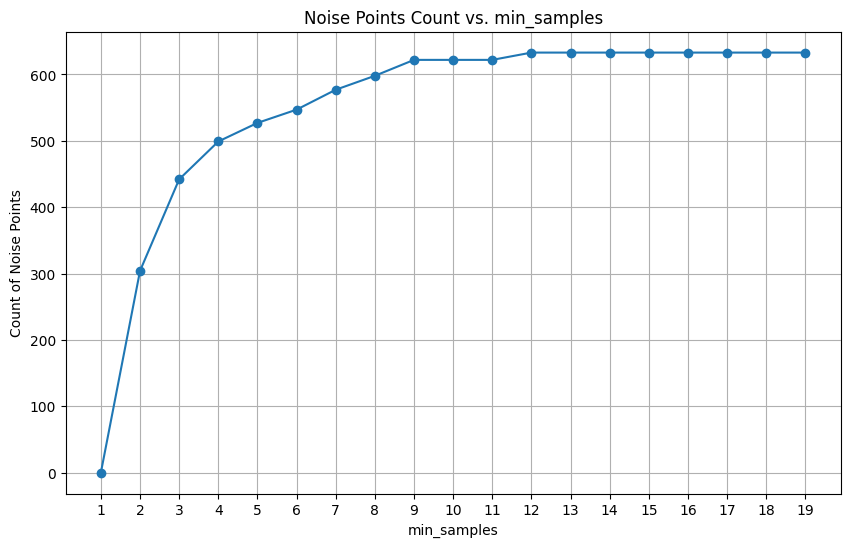

In [12]:


noise_counts = []

for i in range(1,20):
    dbscan = DBSCAN(eps=0.01, min_samples=i)
    cluster_labels = dbscan.fit_predict(feature_matrix_scaled)     
    gdf['db_cluster'] = cluster_labels
    noise_count = np.sum(cluster_labels == -1)
    noise_counts.append(noise_count)

plt.figure(figsize=(10, 6))
plt.plot(range(1,20), noise_counts, marker='o')
plt.title('Noise Points Count vs. min_samples')
plt.xlabel('min_samples')
plt.ylabel('Count of Noise Points')
plt.xticks(range(1,20))
plt.grid(True)
plt.show()


In [13]:
gdf.describe()

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,precipitation,x,y,db_cluster
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,15781.192352,16512.269861,16439.767168,22145.464211,38022.378352,-0.135614,0.302388,-0.047354,0.104636,5.966070,50.850264,-0.953313
std,10741.693671,9724.793070,9812.602624,7952.720612,5646.680767,0.085644,0.233539,0.150457,0.041973,3.244269,1.697791,0.211126
min,4723.324310,6392.169514,6005.268175,7226.766872,13582.825013,-0.470301,-0.474968,-0.280304,0.006456,-4.275854,35.257051,-1.000000
25%,8630.190043,9779.428867,9521.082316,16169.703876,33897.769191,-0.196012,0.089431,-0.162832,0.076140,4.029681,50.798329,-1.000000
50%,9455.704191,11189.190096,11188.938903,20331.048746,38983.083363,-0.130447,0.283327,-0.110483,0.110713,4.914839,51.031935,-1.000000
75%,23671.366011,23789.512701,24018.203799,27254.665431,42696.708624,-0.069973,0.483562,0.068238,0.132120,6.792238,51.550000,-1.000000
max,46938.573355,45195.867534,45758.770354,45482.433623,48786.438160,0.072513,0.812030,0.488777,0.272388,30.563361,54.870541,0.000000


In [14]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=120)
clusters = clusterer.fit_predict(feature_matrix_scaled)
gdf['cluster'] = clusters
gdf.describe()

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,precipitation,x,y,db_cluster,cluster
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.0
mean,15781.192352,16512.269861,16439.767168,22145.464211,38022.378352,-0.135614,0.302388,-0.047354,0.104636,5.966070,50.850264,-0.953313,-1.0
std,10741.693671,9724.793070,9812.602624,7952.720612,5646.680767,0.085644,0.233539,0.150457,0.041973,3.244269,1.697791,0.211126,0.0
min,4723.324310,6392.169514,6005.268175,7226.766872,13582.825013,-0.470301,-0.474968,-0.280304,0.006456,-4.275854,35.257051,-1.000000,-1.0
25%,8630.190043,9779.428867,9521.082316,16169.703876,33897.769191,-0.196012,0.089431,-0.162832,0.076140,4.029681,50.798329,-1.000000,-1.0
50%,9455.704191,11189.190096,11188.938903,20331.048746,38983.083363,-0.130447,0.283327,-0.110483,0.110713,4.914839,51.031935,-1.000000,-1.0
75%,23671.366011,23789.512701,24018.203799,27254.665431,42696.708624,-0.069973,0.483562,0.068238,0.132120,6.792238,51.550000,-1.000000,-1.0
max,46938.573355,45195.867534,45758.770354,45482.433623,48786.438160,0.072513,0.812030,0.488777,0.272388,30.563361,54.870541,0.000000,-1.0


In [15]:
gdf[gdf['cluster'] == -1].describe()

,SR_B2,SR_B3,SR_B4,SR_B5,ST_B10,NDBI,NDVI,NDWI,precipitation,x,y,db_cluster,cluster
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.0
mean,15781.192352,16512.269861,16439.767168,22145.464211,38022.378352,-0.135614,0.302388,-0.047354,0.104636,5.966070,50.850264,-0.953313,-1.0
std,10741.693671,9724.793070,9812.602624,7952.720612,5646.680767,0.085644,0.233539,0.150457,0.041973,3.244269,1.697791,0.211126,0.0
min,4723.324310,6392.169514,6005.268175,7226.766872,13582.825013,-0.470301,-0.474968,-0.280304,0.006456,-4.275854,35.257051,-1.000000,-1.0
25%,8630.190043,9779.428867,9521.082316,16169.703876,33897.769191,-0.196012,0.089431,-0.162832,0.076140,4.029681,50.798329,-1.000000,-1.0
50%,9455.704191,11189.190096,11188.938903,20331.048746,38983.083363,-0.130447,0.283327,-0.110483,0.110713,4.914839,51.031935,-1.000000,-1.0
75%,23671.366011,23789.512701,24018.203799,27254.665431,42696.708624,-0.069973,0.483562,0.068238,0.132120,6.792238,51.550000,-1.000000,-1.0
max,46938.573355,45195.867534,45758.770354,45482.433623,48786.438160,0.072513,0.812030,0.488777,0.272388,30.563361,54.870541,0.000000,-1.0


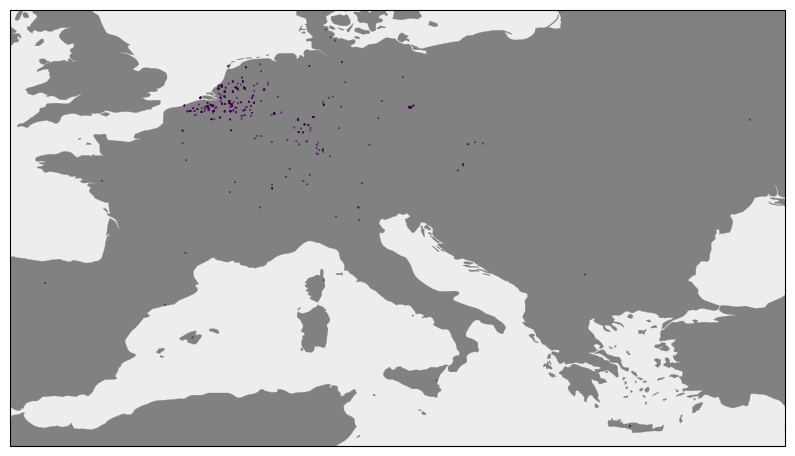

In [16]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

gdf.plot(ax=ax, markersize=.11, c=gdf['cluster']) 

plt.show()

/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.

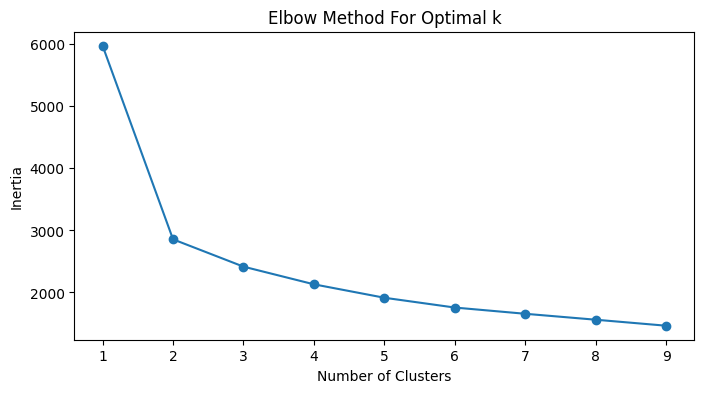

In [17]:
from sklearn.cluster import KMeans

inertias = []
range_of_clusters = range(1, 10)  # Example range, adjust as needed

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k).fit(feature_matrix_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range_of_clusters, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


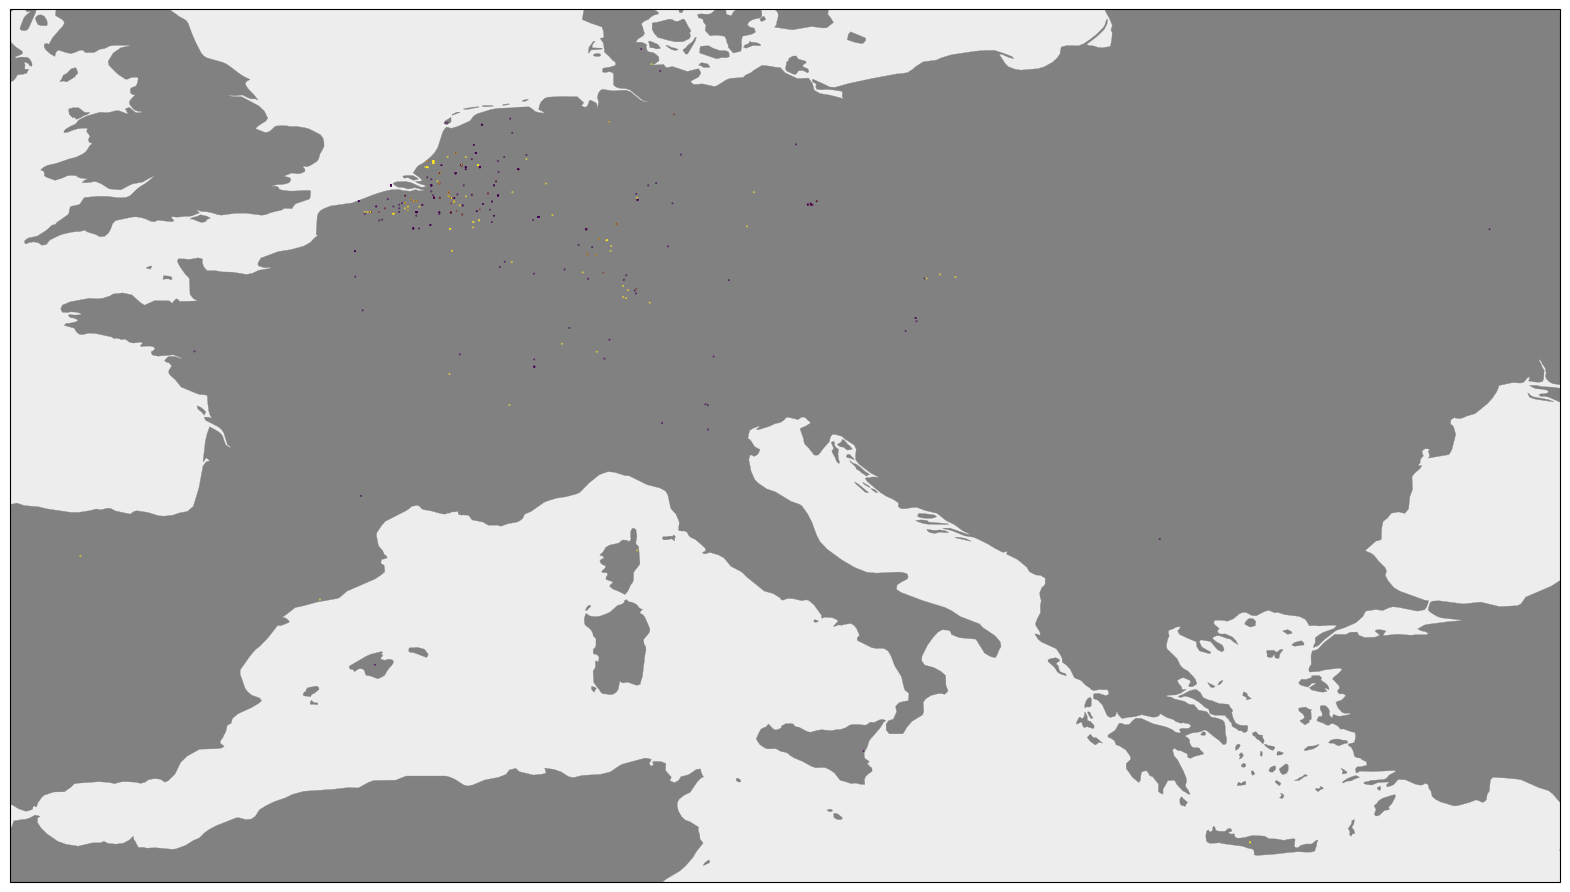

In [20]:


kmeans = KMeans(n_clusters=2)
gdf['k_cluster'] = kmeans.fit_predict(feature_matrix_scaled)

plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

gdf.plot(ax=ax, markersize=.11, c=gdf['k_cluster']) 

plt.show()

In [21]:
classes = gdf.groupby('k_cluster')
classes.describe()

SR_B2                                                         \
           count          mean          std           min           25%   
k_cluster                                                                 
0          459.0   9295.811822  1688.380135   4723.324310   8521.096511   
1          205.0  30302.117537  7878.563488  13501.961194  25855.844672   

                                                     SR_B3                ...  \
                    50%           75%           max  count          mean  ...   
k_cluster                                                                 ...   
0           8943.892643   9561.662719  18380.995558  459.0  10667.225008  ...   
1          30411.166383  35780.948021  46938.573355  205.0  29599.467848  ...   

          db_cluster      cluster                                     
                 75%  max   count mean  std  min  25%  50%  75%  max  
k_cluster                                                             
0               -1.0  0.0   459.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1               -1.0 -1.0   205.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[2 rows x 104 columns]

/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/cluster/_kmeans.

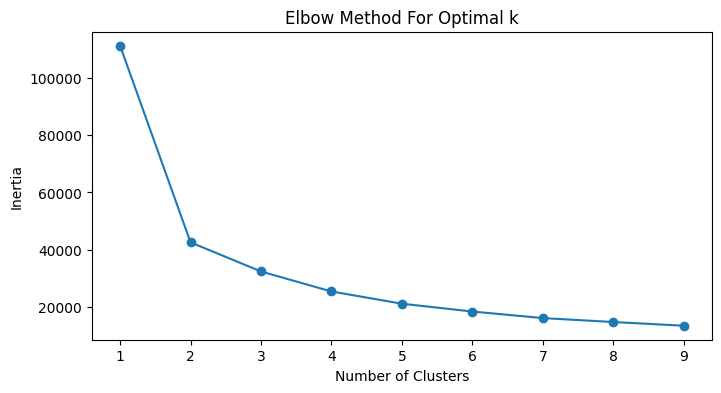

In [16]:
inertias = []
range_of_clusters = range(1, 10)  # Example range, adjust as needed

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k).fit(feature_matrix_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range_of_clusters, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()